In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data = pd.read_excel(r'D:\excelr_assignment\Decision Tree\heart_disease.xlsx', sheet_name='Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
#Check the datatypes and null values
print(data.dtypes)
print(data.isnull().sum())

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [4]:
# filling missing values in 'oldpeak'
data['oldpeak'].fillna(data['oldpeak'].mean() , inplace=True)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

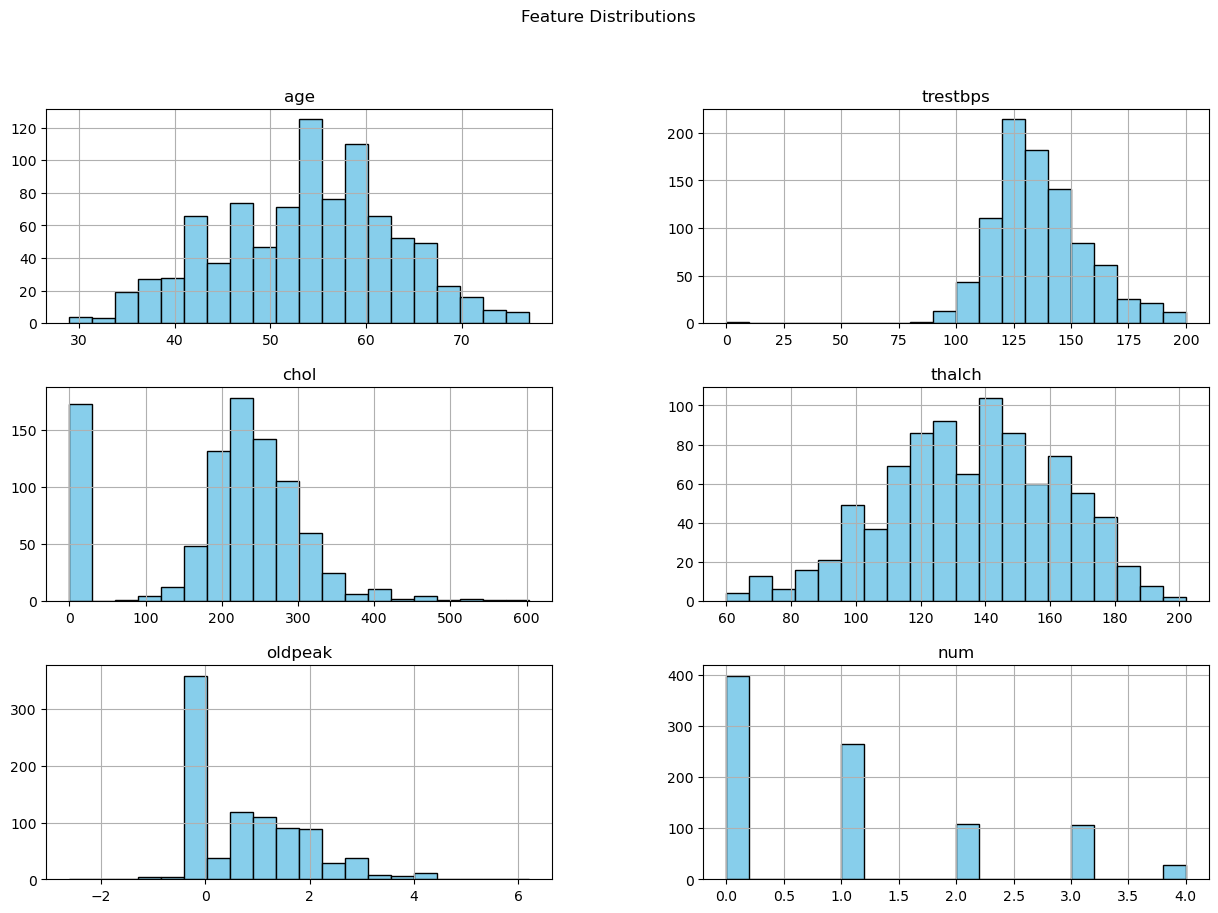

In [6]:
plt.figure(figsize=(15, 10))
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


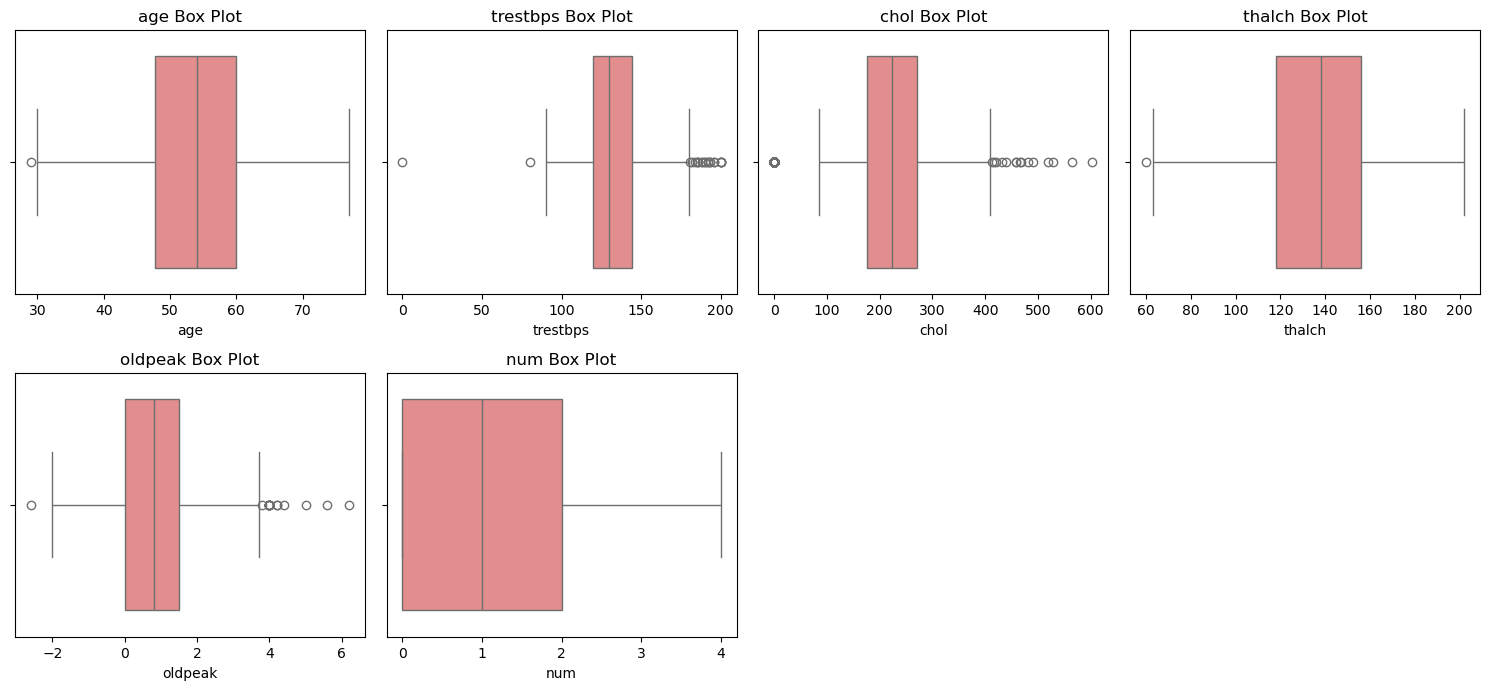

In [7]:
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=data, x=column, color='lightcoral')
    plt.title(f"{column} Box Plot")
plt.tight_layout()
plt.show()

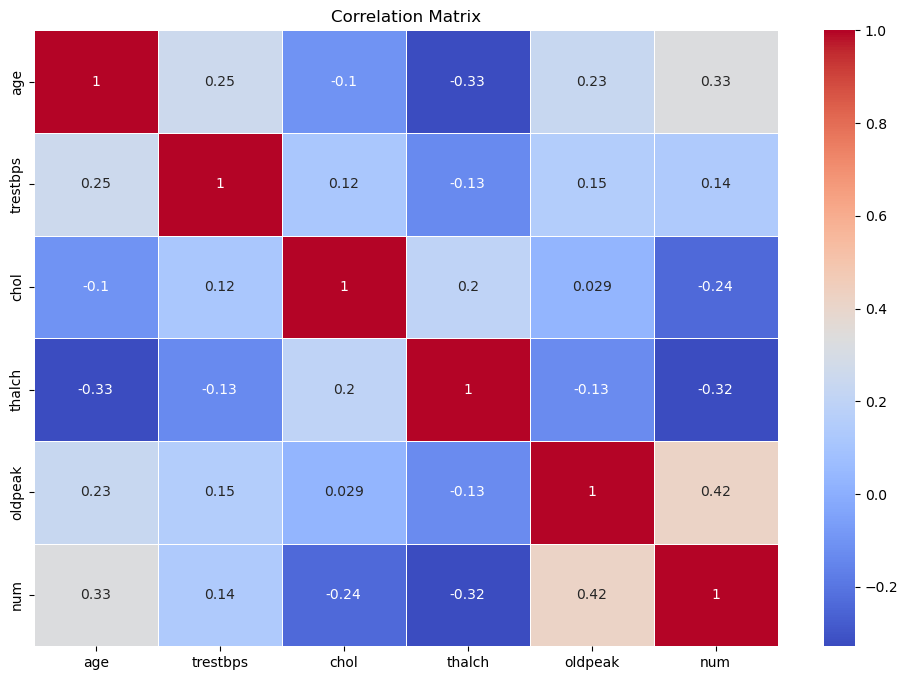

In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute and plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [9]:
#convert bool to integer
data['fbs'] = data['fbs'].astype(int)

In [10]:
#convert all object columns to strings to avoid mixed types
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)

In [11]:
#Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [12]:
#Rename 'num' to 'target' for clarity
data.rename(columns={'num':'target'}, inplace =True)

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [14]:
#split the dataset into fatures (X) and Target (Y)
X=data.drop(columns=['target']) #features
Y = data['target'] #Target

In [15]:
#print the shapes of X and Y to verify the split
print("\nFeatures (X) shape" , X.shape)
print("\nTarget (Y) shape" , Y.shape)


Features (X) shape (908, 12)

Target (Y) shape (908,)


In [16]:
#split the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

In [17]:
#print the shapes of the split dataset to verify
print("\nTraining features (X_train) shape:", X_train.shape)
print("\nTraining features (X_test) shape:", X_test.shape)
print("\nTraining target (Y_train) shape:", Y_train.shape)
print("\nTraining target (Y_test) shape:", Y_test.shape)


Training features (X_train) shape: (726, 12)

Training features (X_test) shape: (182, 12)

Training target (Y_train) shape: (726,)

Training target (Y_test) shape: (182,)


In [18]:
# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
#Evaluate the model
Y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [20]:
print(f"\nAccuracy:{accuracy:.2f}")


Accuracy:0.54


In [21]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76        89
           1       0.38      0.38      0.38        48
           2       0.42      0.45      0.43        22
           3       0.19      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.35      0.35      0.35       182
weighted avg       0.53      0.54      0.54       182



In [22]:
print("\nCConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


CConfusion Matrix:
 [[68 15  4  2  0]
 [16 18  8  6  0]
 [ 3  3 10  5  1]
 [ 4  8  0  3  2]
 [ 0  4  2  0  0]]


In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

In [24]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

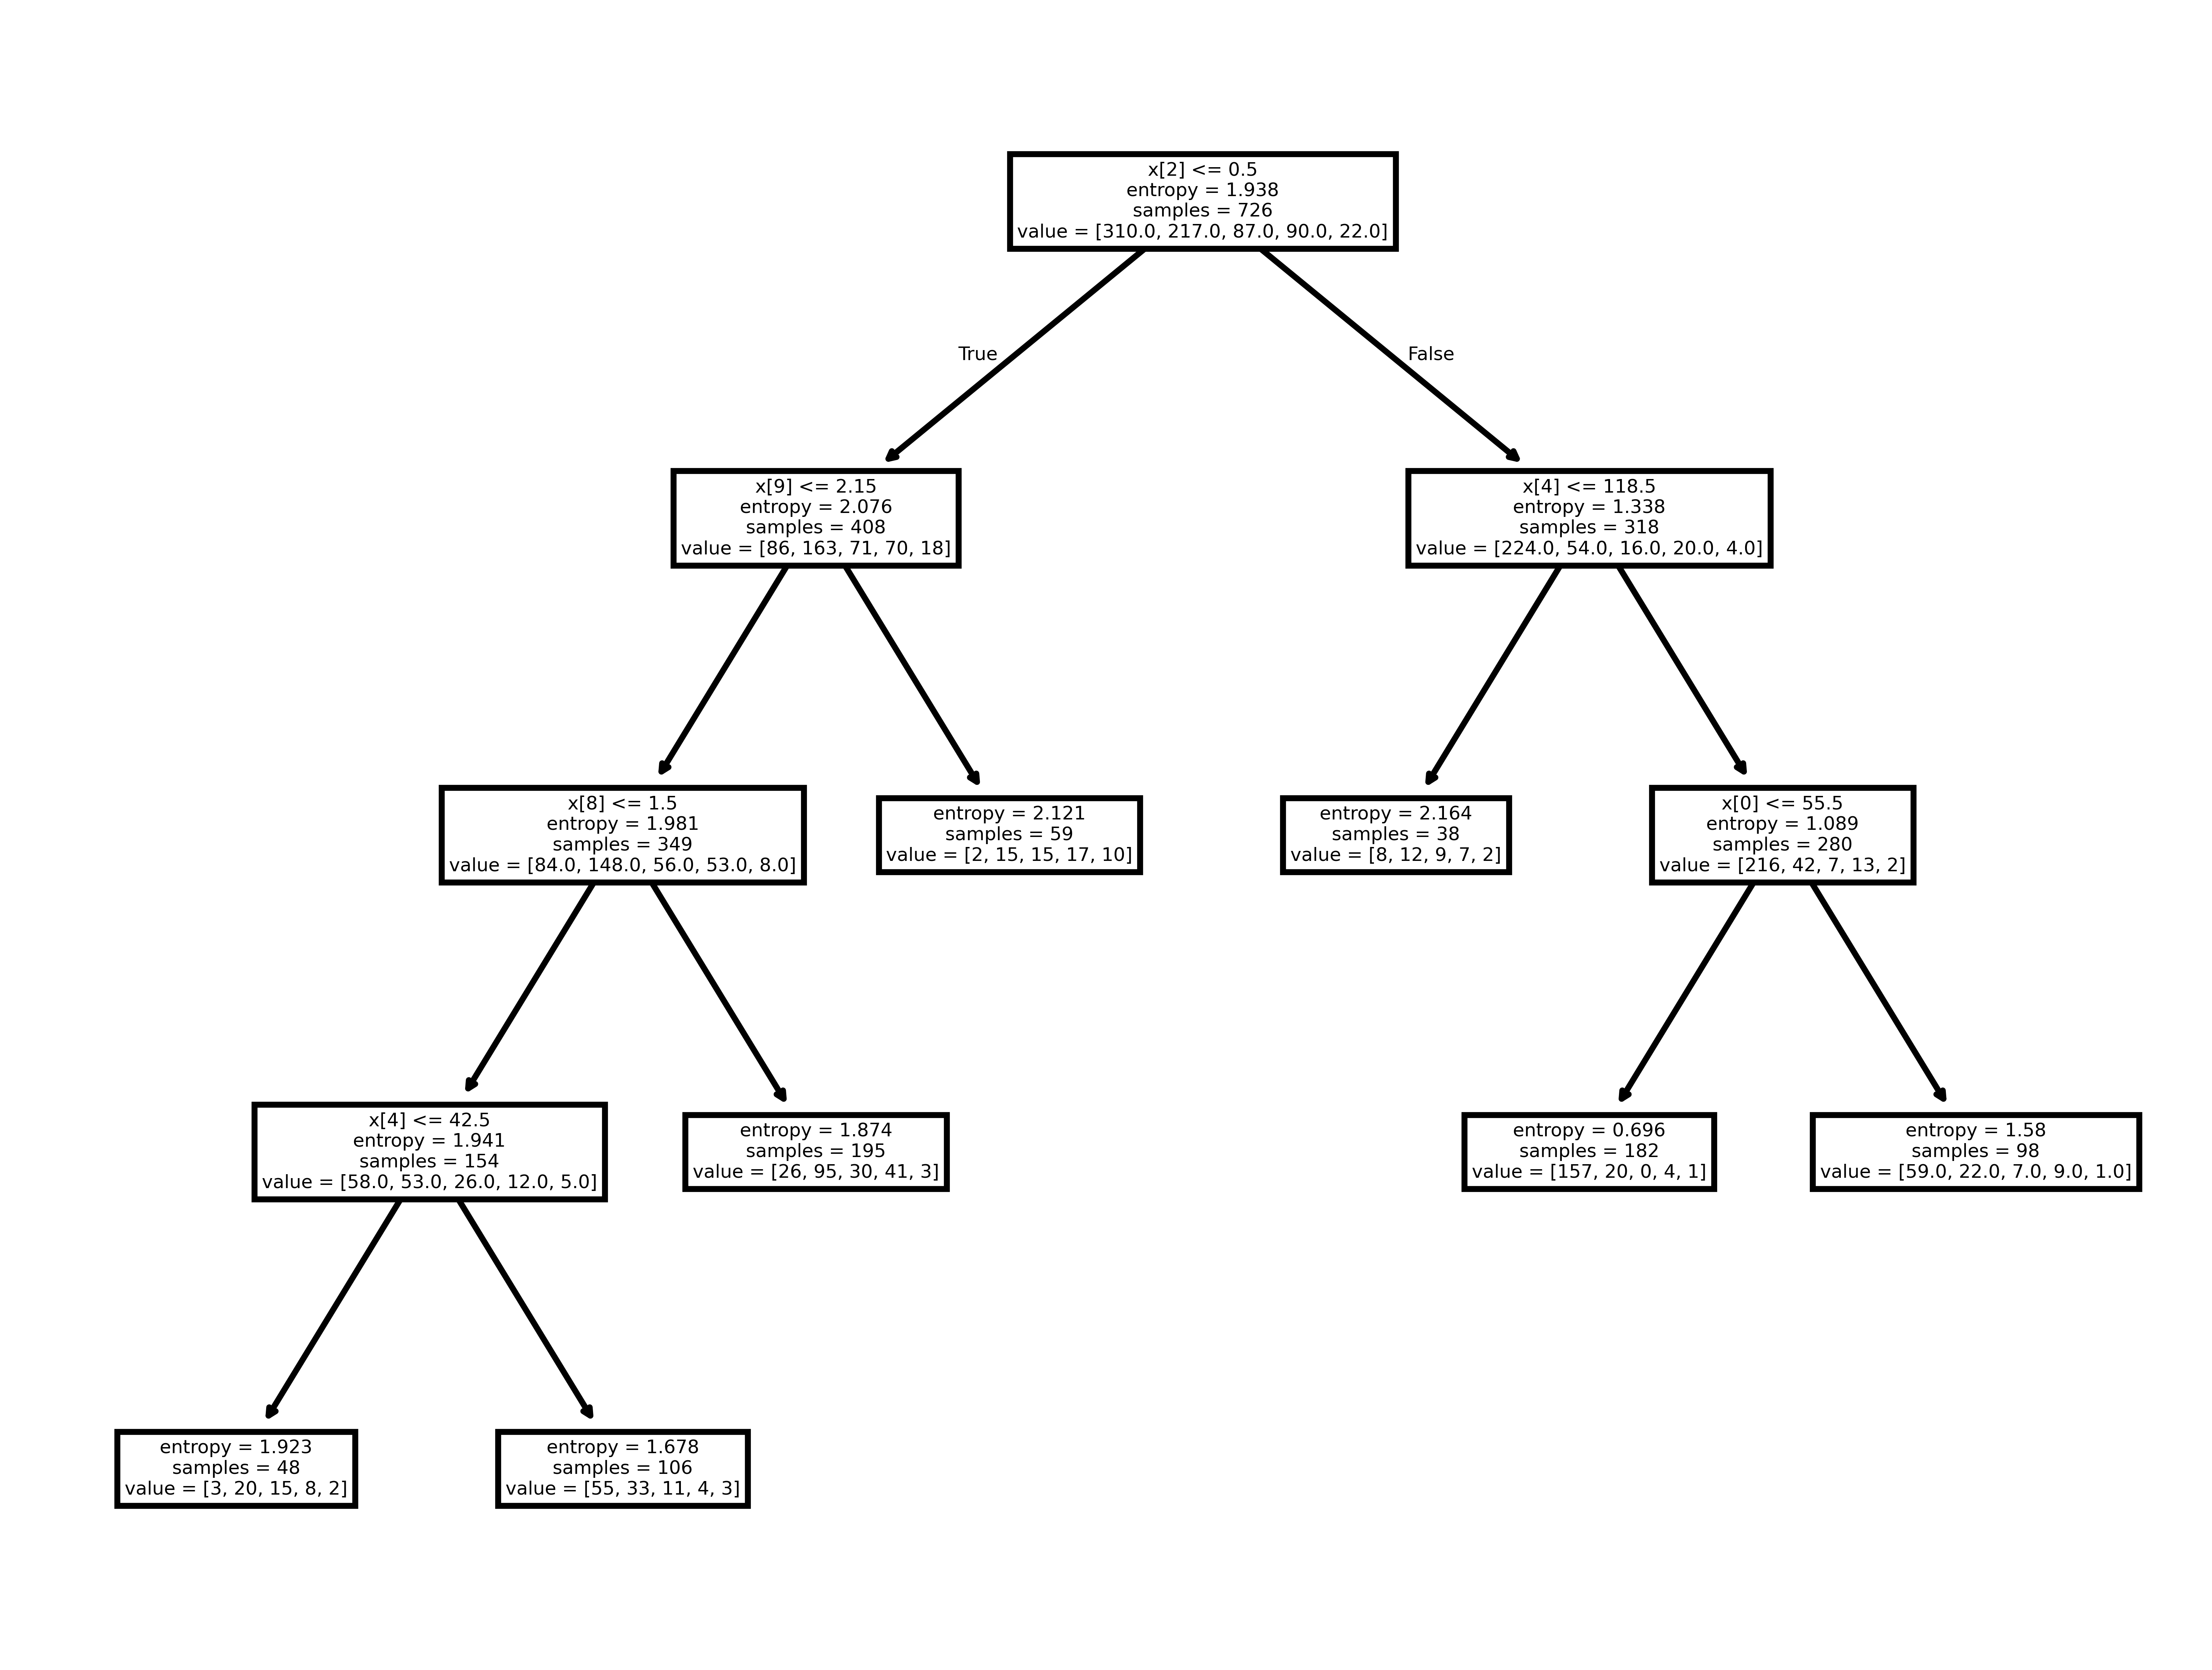

In [25]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [26]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


In [27]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set  
preds


array([1, 1, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       1, 1, 0, 3, 3, 0], dtype=int64)

In [28]:
pd.Series(preds).value_counts() # getting the count of each category

0    109
1     59
3     14
Name: count, dtype: int64

In [29]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        89
           1       0.39      0.48      0.43        48
           2       0.00      0.00      0.00        22
           3       0.21      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.46      0.56      0.51       182



In [70]:
# Prediction on train data

pred_train = model.predict(X_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       310
           1       0.45      0.59      0.51       217
           2       0.00      0.00      0.00        87
           3       0.29      0.19      0.23        90
           4       0.00      0.00      0.00        22

    accuracy                           0.57       726
   macro avg       0.29      0.33      0.30       726
weighted avg       0.47      0.57      0.51       726



In [ ]:
2.
Label Encoding and One-Hot Encoding are methods for converting categorical data into numerical form for machine learning models. They differ in 
approach, use cases, and impact on model performance.

Label Encoding
Concept: Assigns a unique integer to each category in a feature.
Example: ["Red", "Green", "Blue"] → [0, 1, 2]
Advantages:
Simple and memory-efficient.
Suitable for ordinal data (categories with inherent order, e.g., "Small", "Medium", "Large").
Disadvantages:
Implies a ranking for nominal data (categories without order, e.g., "Red", "Green", "Blue"), which may mislead models.
Best For: Ordinal data or models that handle categorical inputs (e.g., decision trees).

One-Hot Encoding
Concept: Creates a binary column for each category in a feature, with only one column set to "1" for each observation.
Example: ["Red", "Green", "Blue"] → [1, 0, 0], [0, 1, 0], [0, 0, 1]
Advantages:
Eliminates ordinal relationships, making it ideal for nominal data.
Disadvantages:
Increases dimensionality, especially for features with many unique categories, leading to higher memory and computational costs.
Best For: Nominal data or models that assume no ordinal relationships (e.g., regression, neural networks).

